# <center>E-learning - Data Analysis Project</center>

<div align="center"> 
        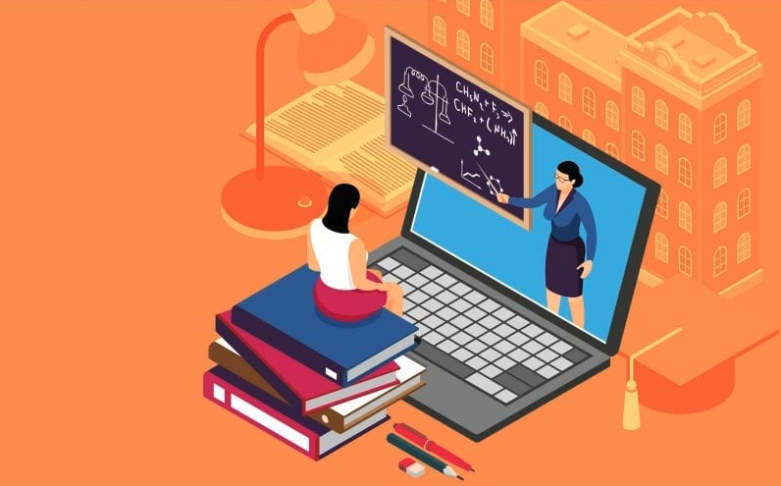
</div>

The main objective of this project is analysis of data from an unidentified e-learning platform. The data is divided among the four files listed below:
- *assessments.csv*
- *courses.csv*
- *studentAssessment.csv*
- *studentRegistation.csv*

The two main components of the project are **exploratary data analysis (EDA)** and **customer behaviour analysis**. In the first section the content from input files is analyzed. Additionally, the definition of the term "**course**", which will be used frequently futher, is identified. The second section consists of six specific questions. In this part, hypothetical business requests are simulated.

<a id='top'></a>
The project's structure:
    
I. [EDA](#eda)


1. [Input files structure](#input_files)


2. [What does the term "course" mean in the context of the task?](#course_meaning)


II. [Customer Behaviour Analysis (Requests from Business)](#customer_behaviour_analysis)

1. [How many students have successfully completed only one course?](#cba_1) 
<br>Passing the course exam is required for successful completion.


2. [Find the most difficult and the easiest exam](#cba_2). 
<br>Difficulty should be determined based on the *completion_rate* = $\frac{N_{passed}}{N_{tries}}$, where ${N_{passed}}$ - number of successfully passed exams and ${N_{tries}}$ - number of total tries to pass the exam.


3. [Calculate the average time to pass an exam for each subject](#cba_3). 
<br>Only successfully passed exams should be taken into account for this question.


4. [Find the most popular (top-3) subjects and subjects with the highest level of churn (top-3)](#cba_4)
<br>Most popular should be identified based on number of registrations.


5. [Using time period starting from 2013 and ending in 2014 identify two semesters](#cba_5):
    - with the lowest completion rates among courses
    - with the longest average times to pass the exams


6. [Describe students through clusters using **RFM Analysis**](#cba_6)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)

<a id='eda'></a>
# I. EDA

<a id='input_files'></a>
## I-1. Input files structure
### assessments.csv

*assessments.csv* contains information about tests results. Every subject typically has a number of tests with results during each semester, followed by a final exam.

The columns in the file are as follows:

- **code_module** — identification code for subject
- **code_presentation** - semester (identification code)
- **id_assessment** - test id
- **assessment_type** - type of the test. There are three different types: **TMA** - by a teacher, **CMA** - by a computer, **Exam** - final exam
- **date** - date of the test's end. It is determined as a number of days since the start of the semester. Date of the start of the semester equals to 0. 
- **weight** - percentage (%) of a test's weight in a course's final grade. Typically exams carry 100% weighting and are considered separetely. The total weight of the results from all other tests is 100%.

In [3]:
df_assess = pd.read_csv('data/assessments.csv')
print(df_assess.shape)

df_assess.head()

(206, 6)


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [4]:
df_assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [5]:
df_assess['code_module'].unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [6]:
df_assess.query("code_module == 'CCC'")

,code_module,code_presentation,id_assessment,assessment_type,date,weight
54,CCC,2014B,24286,CMA,18.0,2.0
55,CCC,2014B,24287,CMA,67.0,7.0
56,CCC,2014B,24288,CMA,137.0,8.0
57,CCC,2014B,24289,CMA,207.0,8.0
58,CCC,2014B,24282,TMA,32.0,9.0
59,CCC,2014B,24283,TMA,102.0,22.0
60,CCC,2014B,24284,TMA,151.0,22.0
61,CCC,2014B,24285,TMA,200.0,22.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0


### courses.csv

*courses.csv* contains list of subjects that were offered during the semester.

The columns in the file are as follows:

- **code_module** — identification code for subject
- **code_presentation** - semester (identification code)
- **module_presentation_length** - length of the semester in days

In [7]:
df_courses = pd.read_csv('data/courses.csv')
print(df_courses.shape)

df_courses

(22, 3)


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


### studentAssessment.csv

*studentAssessment.csv* includes test results for students.

The columns in the file are as follows:

- **id_assessment** — test id
- **id_student** - student id
- **date_submitted** - date of test passing, which is calculated as number of days since the beginning of the semester
- **is_banked** - flag, indicating whether the test was refunded from the prior semester. The course can be refunded for the students, who returned from academic leave.
- **score** - test's score. The range is 0 to 100. The score lower than 40 is considered as unsuccessfull.

In [8]:
df_marks = pd.read_csv('data/studentAssessment.csv')
print(df_marks.shape)

df_marks.head()

(173912, 5)


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [9]:
df_marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


## studentRegistration.csv

*studentRegistration.csv* includes test results for students.

The columns in the file are as follows:

- **code_module** — identification code for subject
- **code_presentation** - semester (identification code)
- **id_student** - student id
- **date_registration** - student's date of registration. It's calculated as number of days from the semester's start. For instance, -30 indicates that the student has been enrolled in the course for 30 days prior to its start date.
- **date_unregistration** - date of cancellation of registration. For students who have completed the course, this field is empty.

In [10]:
df_regs = pd.read_csv('data/studentRegistration.csv')
print(df_regs.shape)

df_regs.head()

(32593, 5)


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


[back to the top](#top)

<a id='course_meaning'></a>
## I-2. What does the term "course" mean in the context of the task?

Let's merge two sets of data: student test scores (**studentAssessment.csv**) and test-related information (**assessments.csv**). Next, take a look at different distributions.

In [11]:
df1 = pd.merge(df_marks, df_assess, how = 'left', on = 'id_assessment')
print(df1.shape)
df1.head()

(173912, 10)


,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


### How are students, who took the tests, distributed between subjects and semesters?

In [12]:
df1_stats1 = df1 \
                .groupby(['code_presentation', 'code_module'], as_index = False) \
                .agg(cnt_students = ('id_student', pd.Series.nunique))

df1_stats1.head()

,code_presentation,code_module,cnt_students
0,2013B,BBB,1369
1,2013B,DDD,1065
2,2013B,FFF,1371
3,2013J,AAA,365
4,2013J,BBB,1710


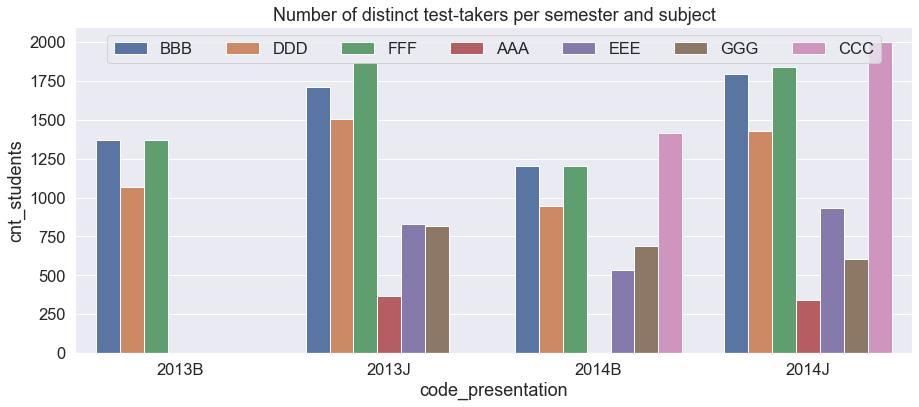

In [13]:
plt.figure(figsize = (15, 6))
sns.barplot(data = df1_stats1, x = 'code_presentation', y = 'cnt_students', 
            hue = 'code_module')
plt.legend(ncol = 7, loc = 'upper center')
plt.title("Number of distinct test-takers per semester and subject");

**cnt_students** - number of distinct students, who took at least one test (any type of test) in the subject during the semester. Test take doesn't have to be successful. The diagram leads to the following conclusions:

- We have data for 2013 and 2014
- Each year consists of two semesters
- Subjects BBB, DDD and FFF were presented in every semester
- AAA was taught only one time a year in the second semester
- EEE and GGG started in the second half of 2013 and since then have been taught in every semester
- ССС appeared only in 2014 and has been taught in every semester

### What types of tests did students take and how many of them did each subject have from semester to semester?

In [14]:
df1_stats2 = df1 \
    .groupby(['code_presentation', 'code_module', 'assessment_type'], as_index = False) \
    .agg(cnt_tests_per_type = ('id_assessment', pd.Series.nunique))

df1_stats2.head()

,code_presentation,code_module,assessment_type,cnt_tests_per_type
0,2013B,BBB,CMA,5
1,2013B,BBB,TMA,6
2,2013B,DDD,CMA,7
3,2013B,DDD,Exam,1
4,2013B,DDD,TMA,6


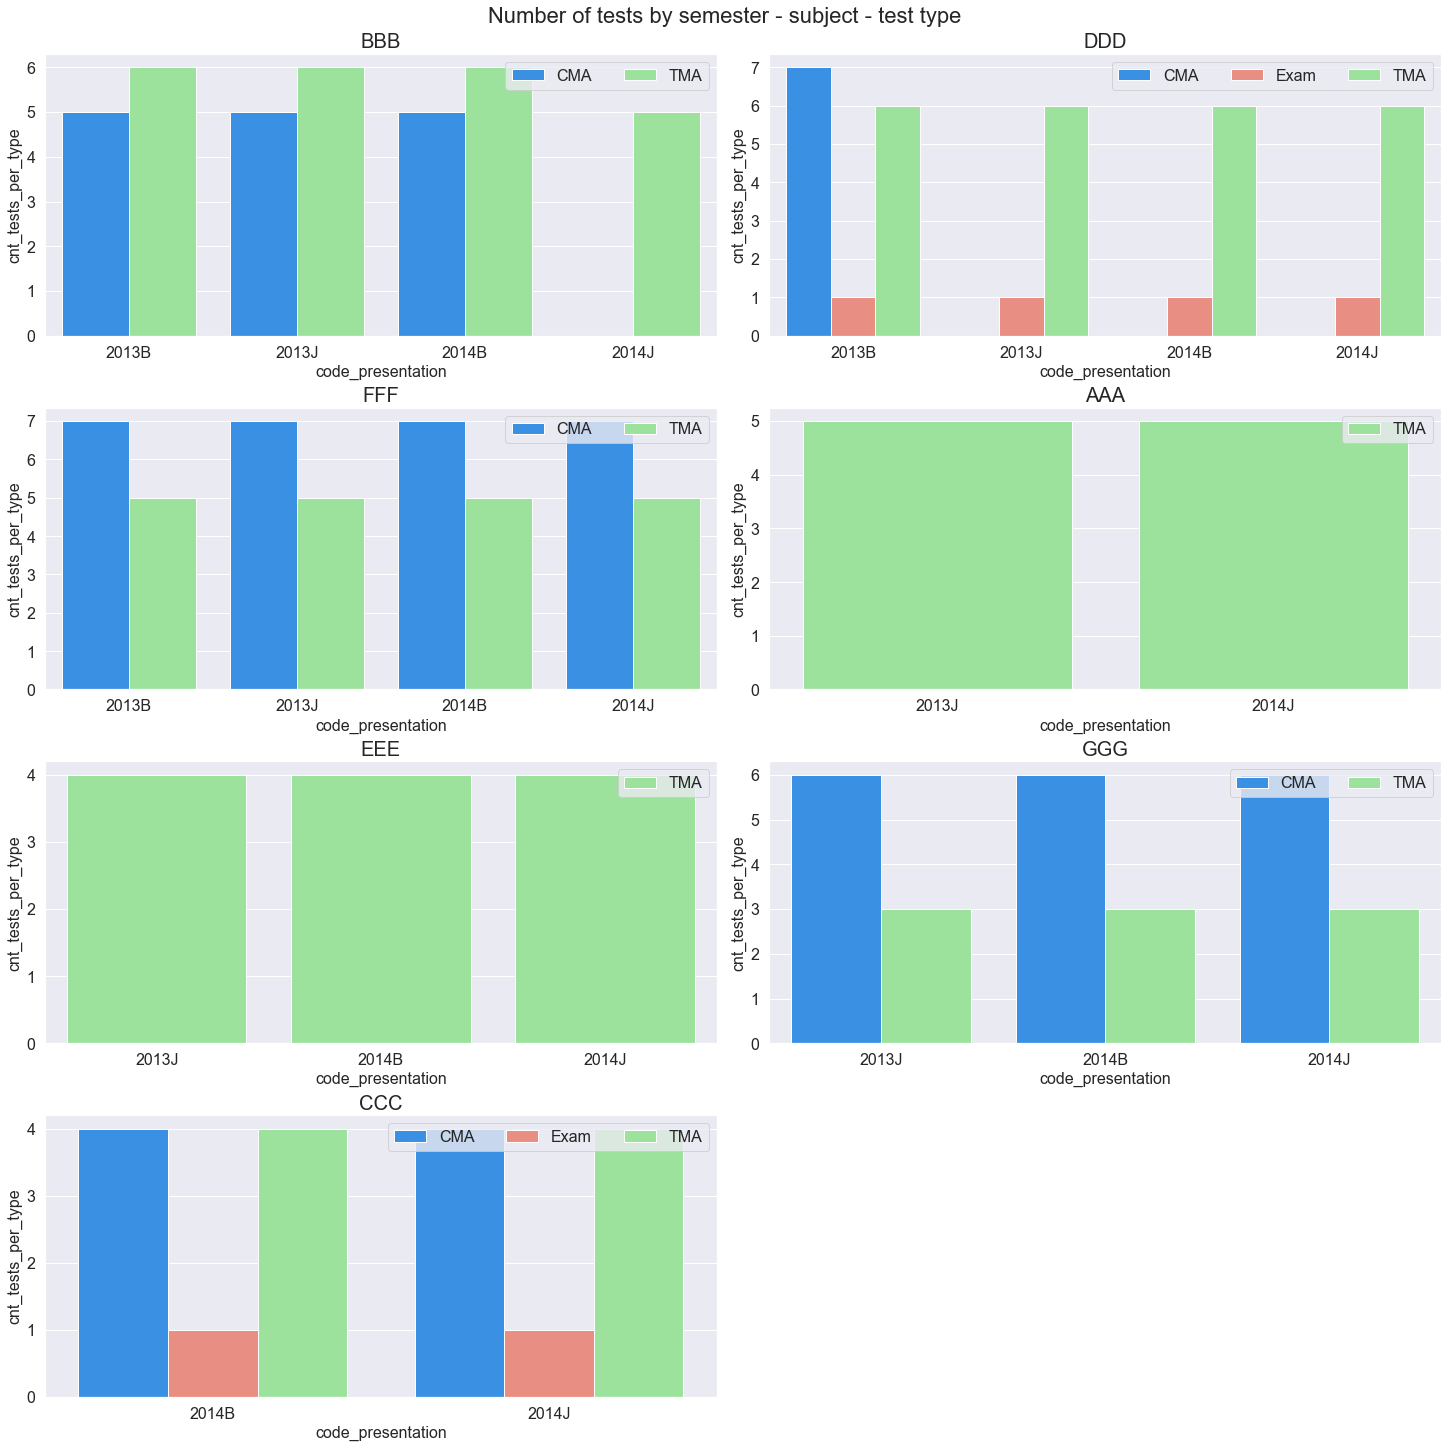

In [15]:
palette ={"CMA": "dodgerblue", "TMA": "lightgreen", "Exam": "salmon"}
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(20, 20), constrained_layout = True)

for module, ax in zip(df1_stats2['code_module'].unique(), axes.flat):
    sns.barplot(data = df1_stats2.query("code_module == @module"), 
                x = 'code_presentation', 
                y = 'cnt_tests_per_type', 
                hue = 'assessment_type',
                palette = palette,
                ax=ax)
    ax.set_title(f'{module}', fontsize=20)
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.legend(fontsize = 16, loc = 'upper right', ncol = 3)

fig.delaxes(axes[3,1])
plt.suptitle('Number of tests by semester - subject - test type', fontsize = 22)
plt.show()

Using the diagram, the following conclusions may be drawn:

- Exams are available for just two subjects: CCC and DDD
- AAA and EEE subjects have only TMA type (by a teacher) of test
- BBB, FFF и GGG have two types of tests: CMA (by a computer) and TMA (by a teacher)
- The number and type of test in the subject can be varied from time to time. For example, in the 2nd semester of 2014, the BBB has only TMA tests, although in the previous three semesters there were also CMA tests. Additionally, the CMA test type was eliminated for the DDD subject beginning in the second semester of 2013

### How did students register for courses?

In [16]:
df1_regs = df_regs \
    .groupby(['code_presentation', 'code_module'], as_index = False) \
    .agg(cnt_students = ('id_student', 'count'))

df1_regs.head()

,code_presentation,code_module,cnt_students
0,2013B,BBB,1767
1,2013B,DDD,1303
2,2013B,FFF,1614
3,2013J,AAA,383
4,2013J,BBB,2237


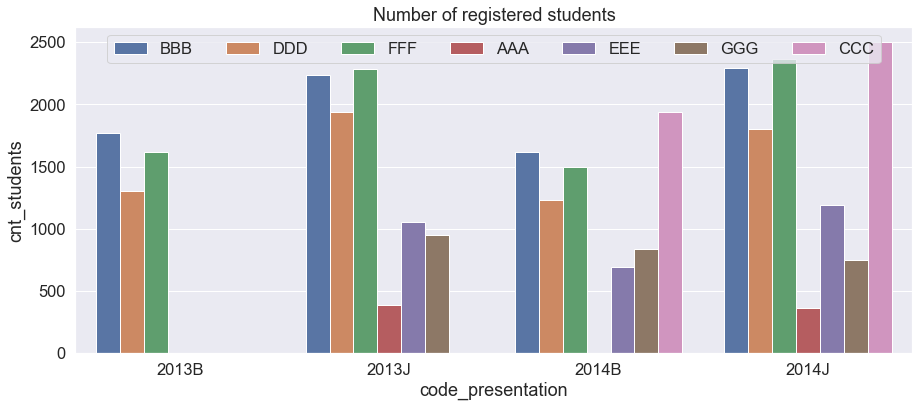

In [17]:
plt.figure(figsize = (15, 6))
sns.barplot(data = df1_regs, x = 'code_presentation', y = 'cnt_students', hue = 'code_module')
plt.legend(ncol = 7, loc = 'upper center')
plt.title("Number of registered students");

The diagram repeats the first one in this section, where the number of students were displayed based on test results.

From all the previously recorded observations, we can formulate that the term **'course' means the subject (code_module) in this task**.

Some courses start every semester, and some start every two semesters, but each course lasts no more than one semester. Courses differ from each other in terms of the date of appearance on the educational platform, as well as in the number and type of tests during the semester.

[back to the top](#top)

<a id='customer_behaviour_analysis'></a>
# II. Customer Behaviour Analysis (Requests from Business)

<a id='cba_1'></a>
## II-1. How many students have successfully completed only one course? 
### Passing the course exam is required for successful completion

There is a requirement to anlayse only courses, which have the **Exam** test type among their tests during semester. To solve this, we use the dataframe that we obtained earlier by combining the test results of students with information about each test.

In [18]:
df1.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [19]:
df1_passed_courses = df1 \
    .query("assessment_type == 'Exam' and score >= 40") \
    .groupby(['id_student'], as_index = False) \
    .agg(cnt_passed_courses = ('code_module', 'count'), 
         cnt_unique_passed_courses = ('code_module', pd.Series.nunique))

df1_passed_courses.head()

,id_student,cnt_passed_courses,cnt_unique_passed_courses
0,23698,1,1
1,24213,1,1
2,27116,1,1
3,28046,1,1
4,28787,1,1


In [20]:
df1_passed_courses.query("cnt_passed_courses == 2 and cnt_unique_passed_courses == 1")

,id_student,cnt_passed_courses,cnt_unique_passed_courses
1272,540758,2,1
2078,593903,2,1
2300,605118,2,1


In [21]:
strange_students = df1_passed_courses.query("cnt_passed_courses != cnt_unique_passed_courses")['id_student'].values

df1 \
    .query("id_student in @strange_students and assessment_type == 'Exam'") \
    .sort_values(by = 'id_student')

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
69983,25340,540758,229,0,40.0,DDD,2013B,Exam,240.0,100.0
87573,25361,540758,234,0,60.0,DDD,2014B,Exam,241.0,100.0
82731,25354,593903,241,0,49.0,DDD,2013J,Exam,261.0,100.0
95711,25368,593903,243,0,44.0,DDD,2014J,Exam,NaN,100.0
82844,25354,605118,237,0,42.0,DDD,2013J,Exam,261.0,100.0
95749,25368,605118,243,0,64.0,DDD,2014J,Exam,NaN,100.0


We have three students who successfully completed the same DDD course twice. In all three cases, students returned to the subject after half a year. They passed the course, there were no activity in the next semester, and then they took it again. They probably wanted to consolidate previously acquired knowledge.

We will also count these students as having successfully completed only one course. Passing the same material twice is still passing the same course.

In [22]:
df1_passed_courses \
    .query('cnt_unique_passed_courses == 1') \
    .shape[0]

3805

*Answer:* **3805** students have successfully completed only once course.

[back to the top](#top)

<a id='cba_2'></a>
## II-2. Find the most difficult and the easiest exam
### Difficulty should be determined based on the *completion_rate*:
$$
\text{completion_rate} = \frac{N_{passed}}{N_{tries}}
$$
where:

- $N_{passed}$ - number of successfully passed exams
- $N_{tries}$ - number of total tries to pass the exam

In [23]:
df1['is_passed'] = df1['score'] >= 40
df1['is_passed'] = df1['is_passed'].map({True: 1, False: 0})

df1_exams = df1 \
    .query("assessment_type == 'Exam'") \
    .groupby(['code_module', 'code_presentation', 'id_assessment'], as_index = False) \
    .agg(cnt_tries = ('id_student', 'count'), 
         cnt_unique_tries = ('id_student', pd.Series.nunique), cnt_passed = ('is_passed', 'sum'))

df1_exams.head()

,code_module,code_presentation,id_assessment,cnt_tries,cnt_unique_tries,cnt_passed
0,CCC,2014B,24290,747,747,664
1,CCC,2014J,24299,1168,1168,1019
2,DDD,2013B,25340,602,602,504
3,DDD,2013J,25354,968,968,878
4,DDD,2014B,25361,524,524,485


In [24]:
# checking for duplicates
df1_exams.query("cnt_tries != cnt_unique_tries")

,code_module,code_presentation,id_assessment,cnt_tries,cnt_unique_tries,cnt_passed


In [25]:
df1_exams['completion_rate'] = df1_exams['cnt_passed'] / df1_exams['cnt_tries']

df1_exams.sort_values('completion_rate', ascending = True)

,code_module,code_presentation,id_assessment,cnt_tries,cnt_unique_tries,cnt_passed,completion_rate
2,DDD,2013B,25340,602,602,504,0.837209
1,CCC,2014J,24299,1168,1168,1019,0.872432
5,DDD,2014J,25368,950,950,842,0.886316
0,CCC,2014B,24290,747,747,664,0.888889
3,DDD,2013J,25354,968,968,878,0.907025
4,DDD,2014B,25361,524,524,485,0.925573


*Answer:* 
- the **most difficult** exam - id_assessment = **25340**
- the **easiest** exam - id_assessment = **25361**

[back to the top](#top)

<a id='cba_3'></a>
## II-3. Calculate the average time to pass an exam for each subject
### Only successfully passed exams should be taken into account for this question

In [26]:
df1.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,is_passed
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,1
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,1
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,1
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,1
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,1


In [27]:
df1 \
    .query("assessment_type == 'Exam' and score >= 40") \
    .groupby('code_module', as_index = False) \
    .agg(avg_date_submitted = ('date_submitted', 'mean'))

,code_module,avg_date_submitted
0,CCC,239.345217
1,DDD,237.976006


*Answer (round to whole numbers):* 
- the average time for subject CCC to pass the exam is **238** days
- for subject DDD - **237**

[back to the top](#top)

<a id='cba_4'></a>
## II-4. Find the most popular (top-3) subjects and subjects with the highest level of  <br> churn (also top-3)
### Most popular subjects should be identified based on number of registrations

In the two-year time period we have subjects that are unevenly represented. There are subjects that were available all four semesters. There are also those taught for three or only two semesters. To make this inequity more equal, popularity and churn will be determined through the average indicators for the semester.

In [28]:
df_regs['is_churn'] = df_regs['date_unregistration'].notnull().map({True: 1, False: 0})
df_regs.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,is_churn
0,AAA,2013J,11391,-159.0,NaN,0
1,AAA,2013J,28400,-53.0,NaN,0
2,AAA,2013J,30268,-92.0,12.0,1
3,AAA,2013J,31604,-52.0,NaN,0
4,AAA,2013J,32885,-176.0,NaN,0


In [29]:
df_regs_stats = df_regs \
    .groupby(['code_module', 'code_presentation'], as_index = False) \
    .agg(cnt_regs = ('id_student', 'count'), 
         cnt_unique_regs = ('id_student', pd.Series.nunique), 
         cnt_unregs = ('is_churn', 'sum'))

df_regs_stats['churn_coeff'] = df_regs_stats['cnt_unregs'] / df_regs_stats['cnt_regs']

df_regs_stats.head()

,code_module,code_presentation,cnt_regs,cnt_unique_regs,cnt_unregs,churn_coeff
0,AAA,2013J,383,383,60,0.156658
1,AAA,2014J,365,365,66,0.180822
2,BBB,2013B,1767,1767,505,0.285795
3,BBB,2013J,2237,2237,647,0.289227
4,BBB,2014B,1613,1613,489,0.303162


In [30]:
# checking for duplicates among registrations
df_regs_stats.query("cnt_regs != cnt_unique_regs")

,code_module,code_presentation,cnt_regs,cnt_unique_regs,cnt_unregs,churn_coeff


In [31]:
df_regs_stats_avg = df_regs_stats \
    .groupby(['code_module'], as_index = False) \
    .agg(cnt_regs_avg = ('cnt_regs', 'mean'), 
         churn_coeff_avg = ('churn_coeff', 'mean'))

df_regs_stats_avg

,code_module,cnt_regs_avg,churn_coeff_avg
0,AAA,374.000000,0.168740
1,BBB,1977.250000,0.299825
2,CCC,2217.000000,0.441889
3,DDD,1568.000000,0.357974
4,EEE,978.000000,0.244826
5,FFF,1940.500000,0.302474
6,GGG,844.666667,0.117960


In [32]:
# ranking by popularity
df_regs_stats_avg[['code_module', 'cnt_regs_avg']].sort_values(by = 'cnt_regs_avg', ascending = False)

,code_module,cnt_regs_avg
2,CCC,2217.000000
1,BBB,1977.250000
5,FFF,1940.500000
3,DDD,1568.000000
4,EEE,978.000000
6,GGG,844.666667
0,AAA,374.000000


In [33]:
# ranking by churn (from highest to lowest)
df_regs_stats_avg[['code_module', 'churn_coeff_avg']].sort_values(by = 'churn_coeff_avg', ascending = False)

,code_module,churn_coeff_avg
2,CCC,0.441889
3,DDD,0.357974
5,FFF,0.302474
1,BBB,0.299825
4,EEE,0.244826
0,AAA,0.168740
6,GGG,0.117960


*Answer:*
- top-3 the most popular subjects: CCC, BBB и FFF
- top-3 subject with the highest level of churn: CCC, DDD и FFF

[back to the top](#top)

<a id='cba_5'></a>
## II-5. Using time period starting from 2013 and ending in 2014 identify two semesters: 
- ### with the lowest completion rates among courses
- ### with the longest average times to pass the exams

### Semester with the lowest completion rate among courses

We can use the dataframe from the [II-2](#cba_2), where the term *completion_rate* was established, to identify the semester with **the lowest completion rates**.

In [34]:
df1_exams

,code_module,code_presentation,id_assessment,cnt_tries,cnt_unique_tries,cnt_passed,completion_rate
0,CCC,2014B,24290,747,747,664,0.888889
1,CCC,2014J,24299,1168,1168,1019,0.872432
2,DDD,2013B,25340,602,602,504,0.837209
3,DDD,2013J,25354,968,968,878,0.907025
4,DDD,2014B,25361,524,524,485,0.925573
5,DDD,2014J,25368,950,950,842,0.886316


We will compute each semester's **average completion rate** in order to determine which semester has the lowest completion rate.

In [35]:
df1_exams \
            .groupby('code_presentation', as_index = False) \
            .agg(avg_completion_rate = ('completion_rate', 'mean')) \
            .sort_values(by = 'avg_completion_rate', ascending = True)

,code_presentation,avg_completion_rate
0,2013B,0.837209
3,2014J,0.879374
1,2013J,0.907025
2,2014B,0.907231


### Semester with the longest average times to pass the exams

**Average time for passing the exam** was calculated in [II-3](#cba_3) for each subject. We will use the same procedure here, but for the semesters.

In [36]:
df1.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,is_passed
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,1
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,1
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,1
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,1
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,1


In [37]:
df1 \
    .query("assessment_type == 'Exam' and score >= 40") \
    .groupby('code_presentation', as_index = False) \
    .agg(avg_date_submitted = ('date_submitted', 'mean')) \
    .sort_values(by = 'avg_date_submitted', ascending = False)

,code_presentation,avg_date_submitted
3,2014J,243.680279
1,2013J,239.509112
2,2014B,232.997389
0,2013B,230.164683


*Answer:*
- semester with the lowest completion rate among courses - **2013B**
- semester with the longest average times to pass the exams - **2014J**

[back to the top](#top)

<a id='cba_6'></a>
## II-6. Describe students through clusters using **RFM Analysis**

Frequently, dividing the client base into distinct groups or segments is necessary for their evaluation. The RFM approach is among the most widely used and successful ways to do it. Further information regarding this technique is available [here](https://guillaume-martin.github.io/rfm-segmentation-with-python.html). In order to divide all students into clusters, we will modify this strategy taken into account the data we have.

### RFM parameters descriptions and data for the analysis

Generally speaking, students enrol in the courses and pass the tests. Exams are the most significant test type according to our data. Based on the exams data, we will define the RFM parameters. They are as follows:
- **Recency** - average time of passing the exam
- **Frequency** - [completion rate](#cba_2) of passing exams
- **Monetary** - average score of passing exams

Those parameters will be calculated for each student. We will use data about all six exams that we have.

In [38]:
df1_exams

,code_module,code_presentation,id_assessment,cnt_tries,cnt_unique_tries,cnt_passed,completion_rate
0,CCC,2014B,24290,747,747,664,0.888889
1,CCC,2014J,24299,1168,1168,1019,0.872432
2,DDD,2013B,25340,602,602,504,0.837209
3,DDD,2013J,25354,968,968,878,0.907025
4,DDD,2014B,25361,524,524,485,0.925573
5,DDD,2014J,25368,950,950,842,0.886316


All exams are distributed between two courses and four semesters. Two years, divided across four semesters, is longer than the methodology's suggested one year. However, as we want to use as much data as possible and we have already dropped other types of tests, we will use all of this data.

### RFM metrics calculation for each student

Let's first check the number of exams that our students have passed.

In [39]:
df1_stats = df1 \
    .query("assessment_type == 'Exam'") \
    .groupby(['id_student'], as_index = False) \
    .agg(cnt_exams = ('id_assessment', 'count'), cnt_unique_exams = ('id_assessment', pd.Series.nunique))
    
df1_stats.head()

,id_student,cnt_exams,cnt_unique_exams
0,23698,1,1
1,24213,1,1
2,27116,1,1
3,28046,1,1
4,28787,1,1


In [40]:
df1_stats.query('cnt_exams != cnt_unique_exams')

,id_student,cnt_exams,cnt_unique_exams


In [41]:
df1_stats['cnt_exams'].value_counts()

1    4307
2     326
Name: cnt_exams, dtype: int64

Most of our students have only passed one exam. We will use the average for the **R-metric** computation, however for the majority of students, this metric will represent the day they passed their one and only exam.

The dataframe that we constructed at the beginning will be used to calculate all metrics.

In [42]:
# dataframe for metrics calculation
# preview on couple of students
df1.query("assessment_type == 'Exam' and id_student in (558914, 24213)")

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,is_passed
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0,0
70122,25340,558914,230,0,36.0,DDD,2013B,Exam,240.0,100.0,0
87448,25361,24213,236,0,58.0,DDD,2014B,Exam,241.0,100.0,1


In [43]:
df_metrics = df1 \
    .query("assessment_type == 'Exam'") \
    .groupby('id_student', as_index = False) \
    .agg(recency = ('date_submitted', 'mean'), 
         monetary = ('score', 'mean'), 
         cnt_exams = ('id_assessment', 'count'),
         cnt_passed = ('is_passed', 'sum'))

df_metrics['frequency'] = 100 * df_metrics['cnt_passed'] / df_metrics['cnt_exams']
df_metrics.head()

,id_student,recency,monetary,cnt_exams,cnt_passed,frequency
0,23698,243.0,80.0,1,1,100.0
1,24213,236.0,58.0,1,1,100.0
2,27116,243.0,96.0,1,1,100.0
3,28046,237.0,40.0,1,1,100.0
4,28787,243.0,44.0,1,1,100.0


For each metric, let's examine the distribution visually to determine the optimal number of segments.

### Recency - segments

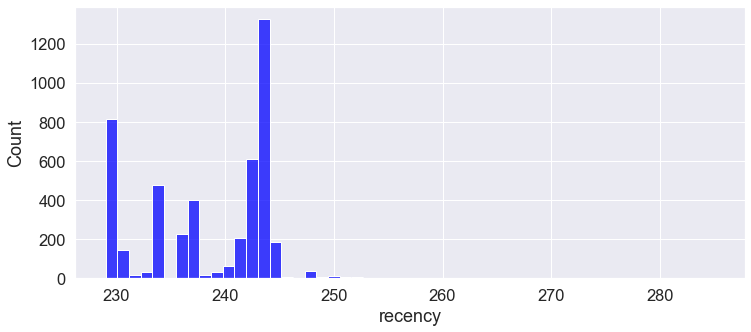

In [44]:
plt.figure(figsize = (12, 5))
sns.histplot(data = df_metrics, x = 'recency', color = 'blue');

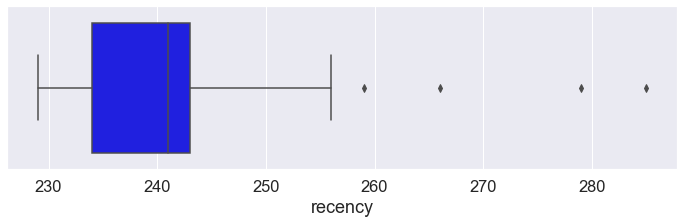

In [45]:
plt.figure(figsize = (12, 3))
sns.boxplot(data = df_metrics, x = 'recency', color = 'blue');

In [46]:
df_metrics['recency'].describe()

count    4633.000000
mean      238.462227
std         5.653378
min       229.000000
25%       234.000000
50%       241.000000
75%       243.000000
max       285.000000
Name: recency, dtype: float64

For **Recency** we identify three segments:

- 1 - **slow students**, everybody who is above 75th percentile
- 2 - **regular students**, anyone falling between 25th and 75th percentiles
- 3 - **quick learners**, everyone below the 25th percentile

In [47]:
def r_score(x):
    if x < df_metrics['recency'].quantile(.25):
        return 3
    elif x >= df_metrics['recency'].quantile(.25) and x <= df_metrics['recency'].quantile(.75):
        return 2
    else:
        return 1

### Monetary - segments

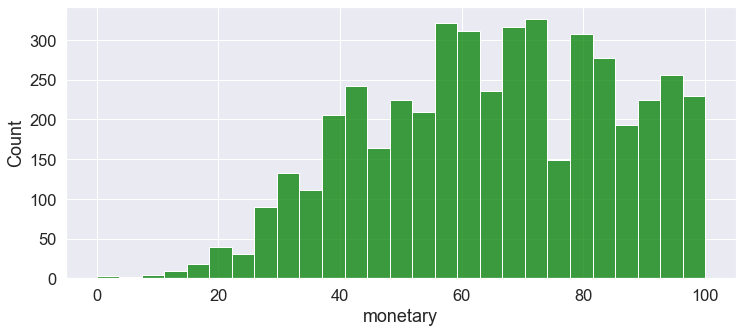

In [48]:
plt.figure(figsize = (12, 5))
sns.histplot(data = df_metrics, x = 'monetary', color = 'green');

Monetary will be split on four segments:
- 1 - 0-39 score. D students or underachievers.
- 2 - 40-64 score - C students.
- 3 - 65-89 score - B students or good students.
- 4 - 90-100 score. A students or excellent students.

In [49]:
def m_score(x):
    if x < 39:
        return 1
    elif x >= 40 and x < 64:
        return 2
    elif x >= 65 and x < 89:
        return 3
    else:
        return 4

### Frequecny - segments

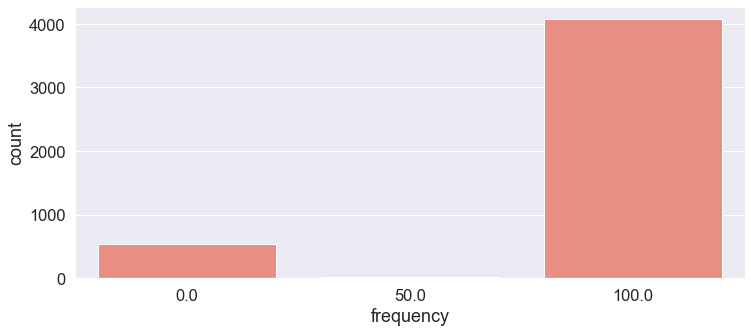

In [50]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df_metrics, x = 'frequency', color = 'salmon');

In [51]:
df_metrics['frequency'].value_counts()

100.0    4069
0.0       536
50.0       28
Name: frequency, dtype: int64

In [52]:
df_metrics['frequency'].value_counts(normalize = True)

100.0    0.878265
0.0      0.115692
50.0     0.006044
Name: frequency, dtype: float64

The individuals with a frequency of 50% represent less than 1% of all students. There's no good need to include them in a different section. Thus, there will only be two here:
- 1 - 0% or 50 % successfully completed courses
- 2 - 100 % successfully completed courses

In [53]:
def f_score(x):
    if x == 100:
        return 2
    else:
        return 1

### Final clusters

In [54]:
df_metrics['R'] = df_metrics['recency'].apply(lambda x: r_score(x))
df_metrics['F'] = df_metrics['frequency'].apply(lambda x: f_score(x))
df_metrics['M'] = df_metrics['monetary'].apply(lambda x: m_score(x))

df_metrics.head()

,id_student,recency,monetary,cnt_exams,cnt_passed,frequency,R,F,M
0,23698,243.0,80.0,1,1,100.0,2,2,3
1,24213,236.0,58.0,1,1,100.0,2,2,2
2,27116,243.0,96.0,1,1,100.0,2,2,4
3,28046,237.0,40.0,1,1,100.0,2,2,2
4,28787,243.0,44.0,1,1,100.0,2,2,2


Let's first examine the distribution of M-segments between two F-segments.

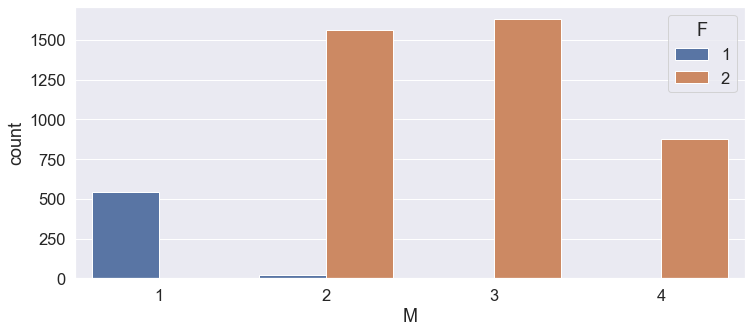

In [55]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df_metrics, x = 'M', hue = 'F');

In [56]:
df_metrics.query("F == 1")['M'].unique()

array([1, 2])

D students or underachievers are entirely presented in the 1st F-segment. C, B and A students are fully placed in the 2nd F-segment. In other words, M and F segments contain the same information about students. The only difference is that M segments are more informative. As a result final clusters will be built using only M and R segments. F segments will be neglected.

In [57]:
df_metrics['segment'] = df_metrics['R'].map(str) + df_metrics['M'].map(str)
df_metrics.head()

,id_student,recency,monetary,cnt_exams,cnt_passed,frequency,R,F,M,segment
0,23698,243.0,80.0,1,1,100.0,2,2,3,23
1,24213,236.0,58.0,1,1,100.0,2,2,2,22
2,27116,243.0,96.0,1,1,100.0,2,2,4,24
3,28046,237.0,40.0,1,1,100.0,2,2,2,22
4,28787,243.0,44.0,1,1,100.0,2,2,2,22


In [58]:
df_metrics['segment'].nunique()

12

We have only 12 clusters. There is no need to create specific names for them. We will use names from corresponding R and M segments. At the end we will see how our students are divided into groups based on their academic achievement and exam-passing speed.

In [59]:
segm_names = {
                '11': 'slow D student',
                '12': 'slow C student',
                '13': 'slow B student',
                '14': 'slow A student',
    
                '21': 'regular D student',
                '22': 'regular C student',
                '23': 'regular B student',
                '24': 'regular A student',
    
                '31': 'speedy D student',
                '32': 'speedy C student',
                '33': 'speedy B student',
                '34': 'speedy A student'
}

df_metrics['segment_name'] = df_metrics['segment'].replace(segm_names)

df_metrics.head()

,id_student,recency,monetary,cnt_exams,cnt_passed,frequency,R,F,M,segment,segment_name
0,23698,243.0,80.0,1,1,100.0,2,2,3,23,regular B student
1,24213,236.0,58.0,1,1,100.0,2,2,2,22,regular C student
2,27116,243.0,96.0,1,1,100.0,2,2,4,24,regular A student
3,28046,237.0,40.0,1,1,100.0,2,2,2,22,regular C student
4,28787,243.0,44.0,1,1,100.0,2,2,2,22,regular C student


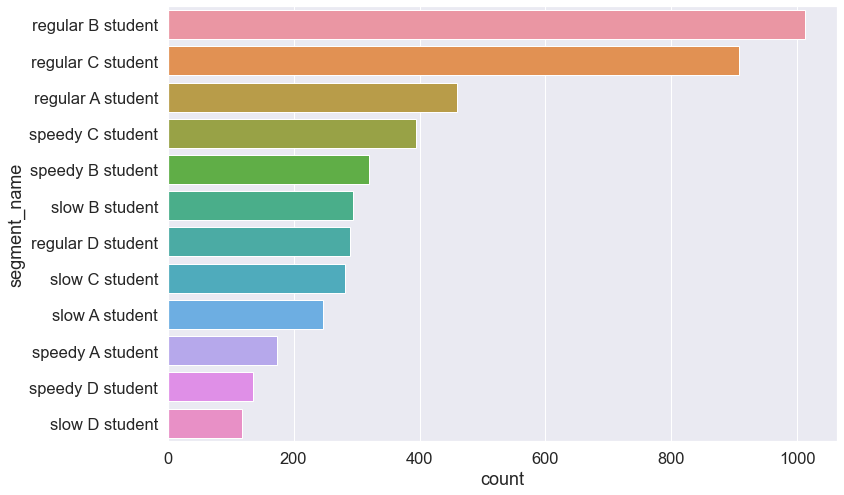

In [60]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(data = df_metrics, orient = 'h',  y = 'segment_name',
             order = df_metrics['segment_name'].value_counts().index);

It is clearly seen that there are two biggest groups: regular B and C students. Regular A students are positioned on third place with a significant gap.  There are much more C and B students than A and D among quick learners. There are a lot of B students among the slow learners.